MODIFICATION TO THE ORIGINAL PROGRAM

In [4]:
import pandas as pd
import numpy as np
import random
np.random.seed(42)
num_samples = 1000
data = {
    "Pepper": np.random.choice([True, False], num_samples),
    "Ginger": np.random.choice([True, False], num_samples),
    "Chilly": np.random.choice([True, False], num_samples),
    "Salt": np.random.choice([True, False], num_samples),
    "Turmeric": np.random.choice([True, False], num_samples)
}
def complex_like_rule(row):
    pepper, ginger, chilly, salt, turmeric = row
    score = 2 * pepper + 1.5 * ginger + 2.5 * chilly - 1 * salt + 0.5 * turmeric + np.random.normal(0, 0.5)
    return score > 2.5
data["Liked"] = [complex_like_rule(row) for row in zip(data["Pepper"], data["Ginger"], data["Chilly"], data["Salt"], data["Turmeric"])]
df_complex = pd.DataFrame(data)
missing_indices = np.random.choice(df_complex.index, size=int(0.1 * num_samples), replace=False)
for col in ["Pepper", "Ginger", "Chilly", "Salt", "Turmeric"]:
    df_complex.loc[missing_indices[:len(missing_indices)//5], col] = np.nan
df_complex

<ipython-input-4-02d82a761ccd>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_complex.loc[missing_indices[:len(missing_indices)//5], col] = np.nan
<ipython-input-4-02d82a761ccd>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_complex.loc[missing_indices[:len(missing_indices)//5], col] = np.nan
<ipython-input-4-02d82a761ccd>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_complex.loc[missing_indices[:len(missing_indices)//5], col] = np.nan
<ipython-inpu

,Pepper,Ginger,Chilly,Salt,Turmeric,Liked
0,True,False,True,False,False,True
1,False,True,False,False,True,False
2,True,True,False,False,True,True
3,True,True,False,False,True,True
4,True,True,False,True,False,False
...,...,...,...,...,...,...
995,True,True,True,False,True,True
996,True,False,True,False,False,True
997,False,True,True,False,True,True
998,False,True,False,False,False,False


In [6]:
print("\nMissing Values Before Handling:")
print(df_complex.isnull().sum())
df_complex.fillna(df_complex.mode().iloc[0], inplace=True)
print("\nMissing Values After Handling:")
print(df_complex.isnull().sum())


Missing Values Before Handling:
Pepper      20
Ginger      20
Chilly      20
Salt        20
Turmeric    20
Liked        0
dtype: int64

Missing Values After Handling:
Pepper      0
Ginger      0
Chilly      0
Salt        0
Turmeric    0
Liked       0
dtype: int64


<ipython-input-6-130256aedd6a>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_complex.fillna(df_complex.mode().iloc[0], inplace=True)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
df_complex.fillna(df_complex.mode().iloc[0], inplace=True)
X_complex = df_complex.drop(columns=["Liked"])
y_complex = df_complex["Liked"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_complex, y_complex, test_size=0.3, random_state=42)
models_complex = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}
for name, model in models_complex.items():
    model.fit(X_train_c, y_train_c)
    predictions = model.predict(X_test_c)
    print(f"\n{name} Performance:")
    print(classification_report(y_test_c, predictions))
    print("Accuracy:", accuracy_score(y_test_c, predictions))



Decision Tree Performance:
              precision    recall  f1-score   support

       False       0.86      0.91      0.89       125
        True       0.93      0.90      0.92       175

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

Accuracy: 0.9033333333333333

Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.85      0.90      0.87       125
        True       0.92      0.89      0.90       175

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

Accuracy: 0.89

Random Forest Performance:
              precision    recall  f1-score   support

       False       0.86      0.91      0.89       125
        True       0.93      0.90      0.92       175

    accuracy                           0.90     

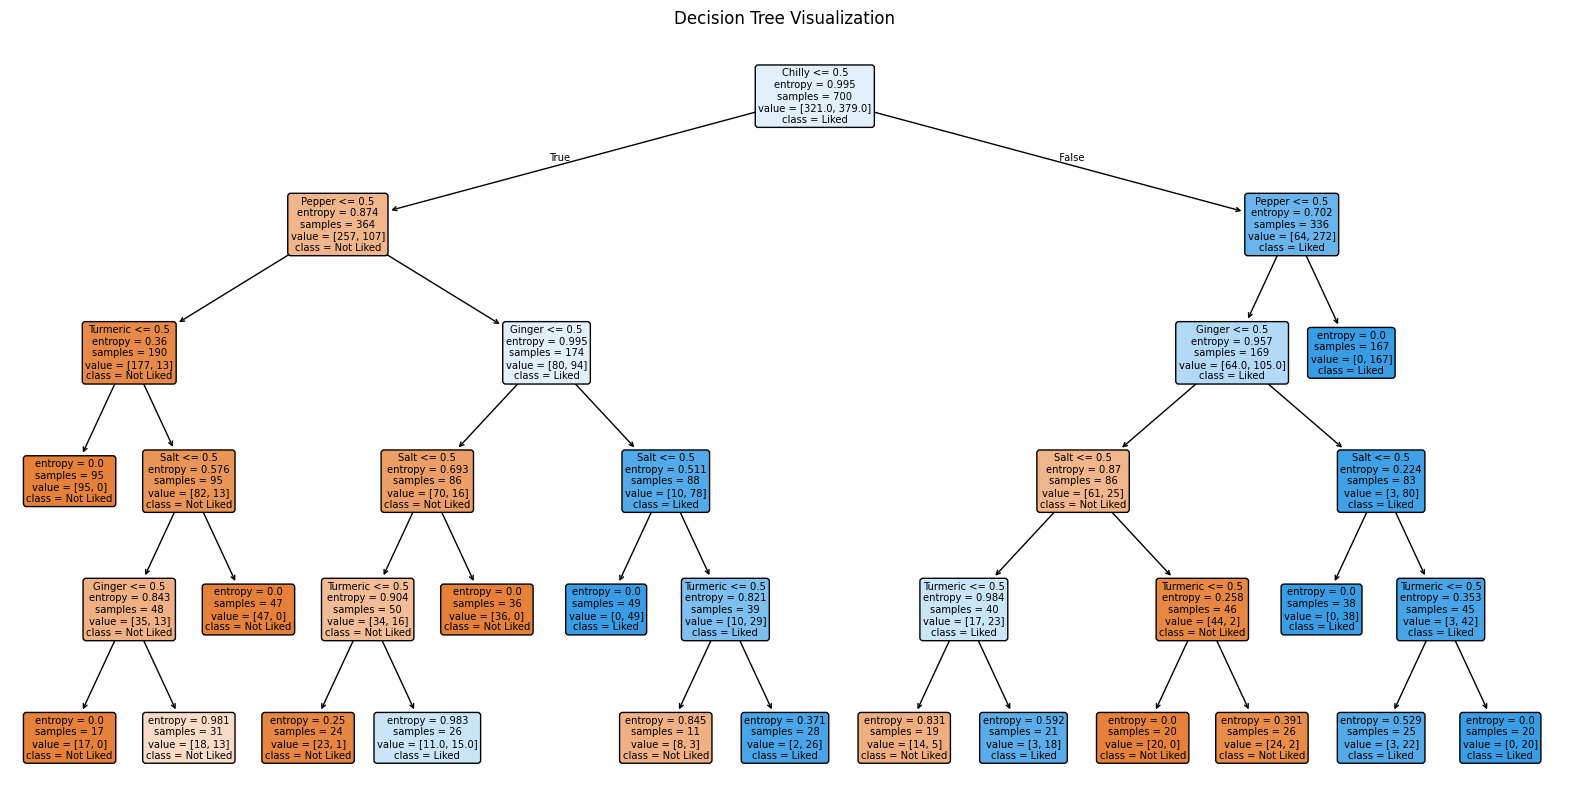

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
dt_model = models_complex["Decision Tree"]
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_complex.columns, class_names=["Not Liked", "Liked"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

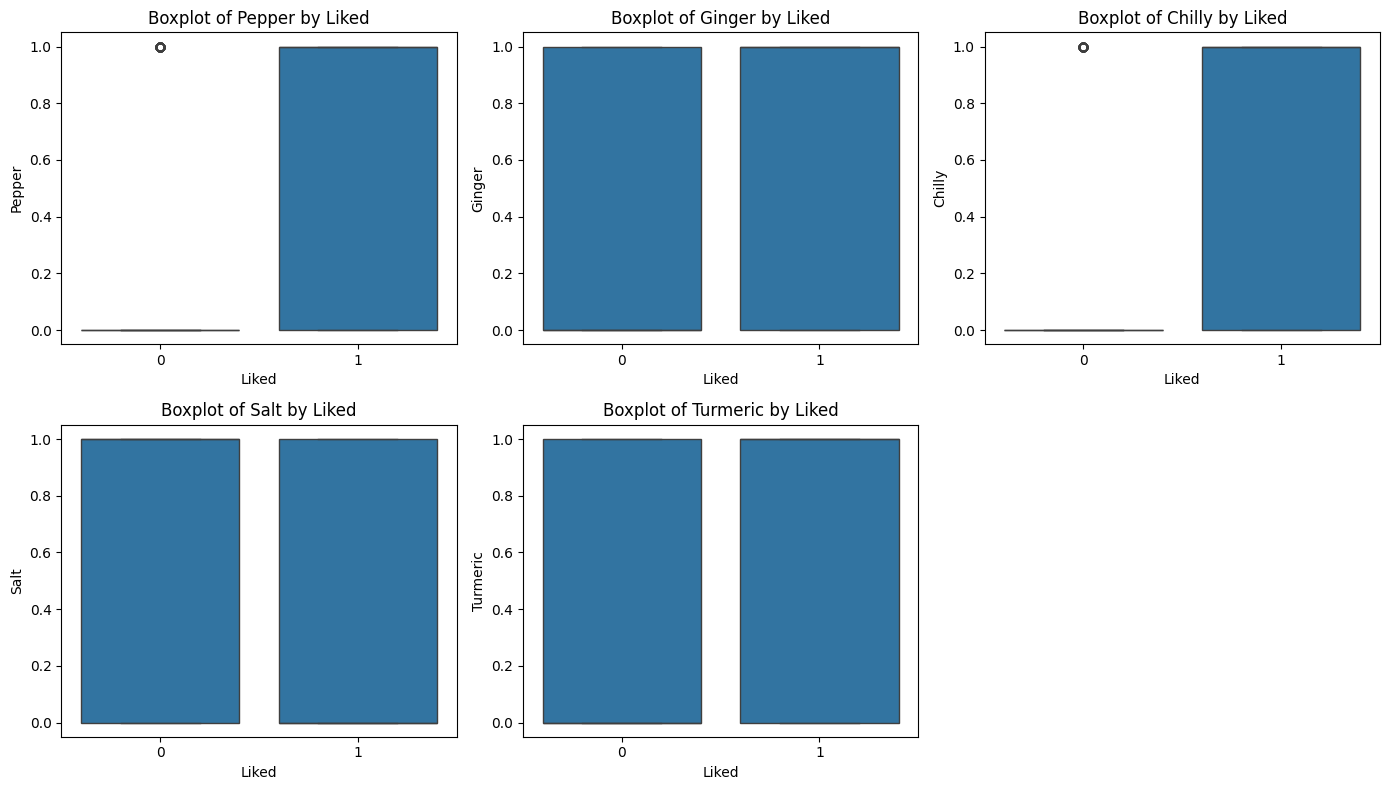

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ["Pepper", "Ginger", "Chilly", "Salt", "Turmeric"]:
    df_complex[col] = df_complex[col].astype(int)
df_complex["Liked"] = df_complex["Liked"].astype(int)

plt.figure(figsize=(14, 8))
for i, feature in enumerate(["Pepper", "Ginger", "Chilly", "Salt", "Turmeric"], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="Liked", y=feature, data=df_complex)
    plt.title(f"Boxplot of {feature} by Liked")
plt.tight_layout()
plt.show()

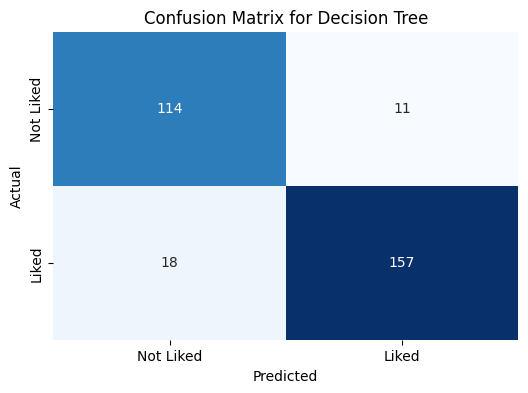

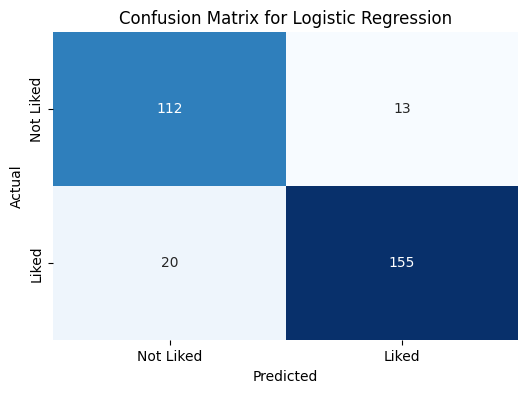

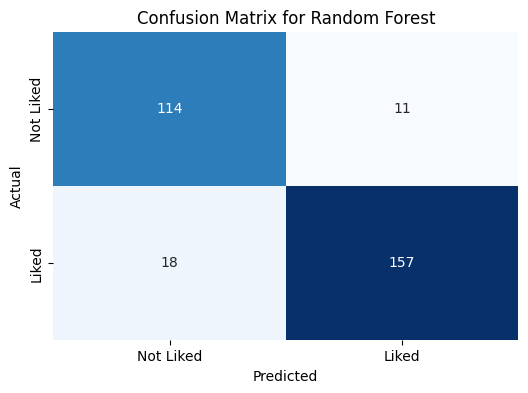

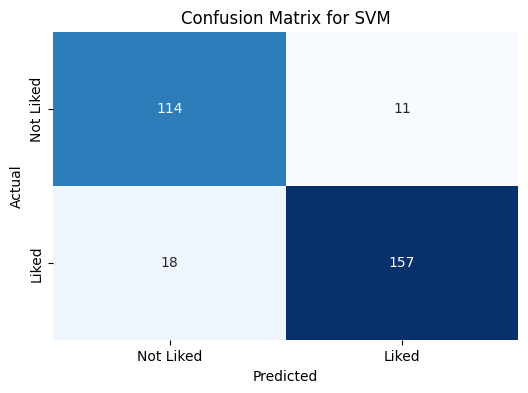

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for name, model in models_complex.items():
    predictions = model.predict(X_test_c)
    cm = confusion_matrix(y_test_c, predictions)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["Not Liked", "Liked"], yticklabels=["Not Liked", "Liked"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()